In [2]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import sklearn

In [3]:
#importing data of underserved school in newyork
schools_data=pd.read_csv("2016 School Explorer.csv")
#importing data of D5 and SHSAT registrations
SHSAT_Data=pd.read_csv("D5 SHSAT Registrations and Testers.csv")

In [4]:
schools_data.head()

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,310100010034,01M034,1,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",...,48,1,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,310100010063,01M063,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0


In [5]:
#checking field names in school dataset
list(schools_data)


['Adjusted Grade',
 'New?',
 'Other Location Code in LCGMS',
 'School Name',
 'SED Code',
 'Location Code',
 'District',
 'Latitude',
 'Longitude',
 'Address (Full)',
 'City',
 'Zip',
 'Grades',
 'Grade Low',
 'Grade High',
 'Community School?',
 'Economic Need Index',
 'School Income Estimate',
 'Percent ELL',
 'Percent Asian',
 'Percent Black',
 'Percent Hispanic',
 'Percent Black / Hispanic',
 'Percent White',
 'Student Attendance Rate',
 'Percent of Students Chronically Absent',
 'Rigorous Instruction %',
 'Rigorous Instruction Rating',
 'Collaborative Teachers %',
 'Collaborative Teachers Rating',
 'Supportive Environment %',
 'Supportive Environment Rating',
 'Effective School Leadership %',
 'Effective School Leadership Rating',
 'Strong Family-Community Ties %',
 'Strong Family-Community Ties Rating',
 'Trust %',
 'Trust Rating',
 'Student Achievement Rating',
 'Average ELA Proficiency',
 'Average Math Proficiency',
 'Grade 3 ELA - All Students Tested',
 'Grade 3 ELA 4s - All S

In [127]:
replaced_NA=schools_data["Economic Need Index"].fillna(0.5)

In [128]:
#storing school name , economic need index and percent black/hispanic in a list
new_lst=[]
for i in range(0,len(schools_data)):
    a=schools_data.iloc[i]['School Name']
    b=replaced_NA.iloc[i]
    b=float(b)
    b=round(b,2)
    c=schools_data.iloc[i]['Percent Black / Hispanic']
    c=float(c[:-1])
    new_lst.append([b,c])
type(c)

float

In [129]:
#another way to see all the field names
schools_data.keys()

Index(['Adjusted Grade', 'New?', 'Other Location Code in LCGMS', 'School Name',
       'SED Code', 'Location Code', 'District', 'Latitude', 'Longitude',
       'Address (Full)',
       ...
       'Grade 8 Math - All Students Tested', 'Grade 8 Math 4s - All Students',
       'Grade 8 Math 4s - American Indian or Alaska Native',
       'Grade 8 Math 4s - Black or African American',
       'Grade 8 Math 4s - Hispanic or Latino',
       'Grade 8 Math 4s - Asian or Pacific Islander',
       'Grade 8 Math 4s - White', 'Grade 8 Math 4s - Multiracial',
       'Grade 8 Math 4s - Limited English Proficient',
       'Grade 8 Math 4s - Economically Disadvantaged'],
      dtype='object', length=161)

In [130]:
#converting list into array
new_array=np.array(new_lst)

In [131]:
x=new_array[:,0:1]

In [132]:
y=new_array[:,1:]
type(y[0][0])

numpy.float64

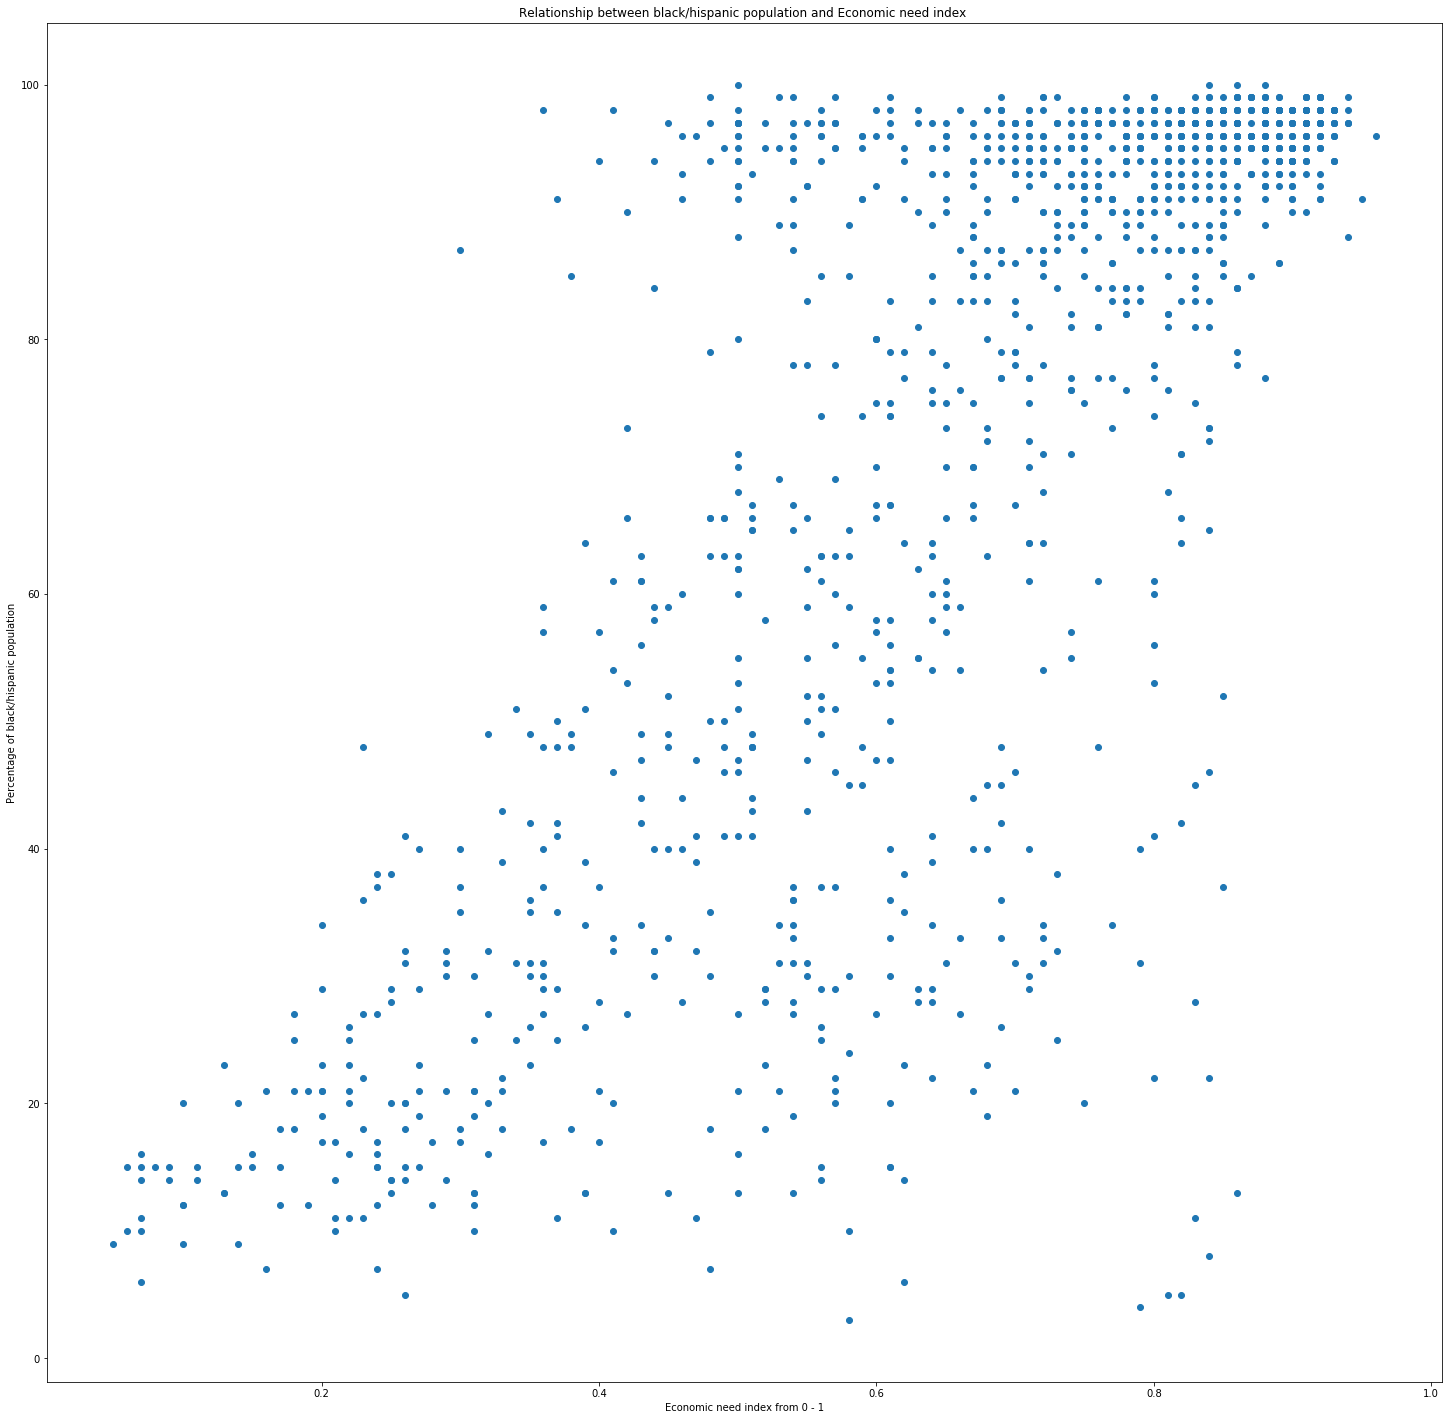

In [133]:
plt.figure(figsize=(25,25))
plt.xlabel("Economic need index from 0 - 1")
plt.ylabel("Percentage of black/hispanic population")
plt.title("Relationship between black/hispanic population and Economic need index ")
plt.scatter(x,y)
plt.show()

In [134]:
#import linear regression from scikit learn and store it in a variable
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [140]:
#Next, we fit the model to our data using the fit method. 
lm.fit(x,y)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [136]:
print('Weight coefficients: ', lm.coef_)
print('y-axis intercept: ', lm.intercept_) 

Weight coefficients:  [[ 106.43824266]]
y-axis intercept:  [ 1.9415369]


In [137]:
plt.scatter(x, y, c='blue')

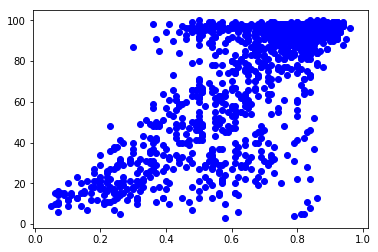

In [138]:
plt.show()

In [144]:
predictions = lm.predict(x)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [ 92.]
Predicted output: [ 99.86472015]
Prediction Error: [ 7.86472015]


In [148]:
x_min = x.min()
x_max = x.max()

In [149]:
y_min_actual = y.min()
y_max_actual = y.max()

In [150]:
y_min = 1.9415369 + 106.43824266 * x_min
y_max = 1.9415369 + 106.43824266 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 3.0
Calculated Min Value: 7.2634490330000006
Actual Max Value: 100.0
Calculated Max Value: 104.1222498536


In [154]:
plt.scatter(x, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

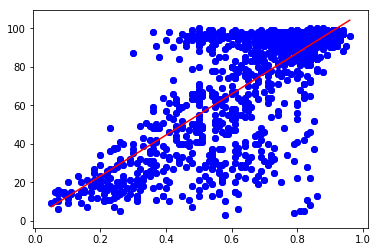

In [155]:
plt.scatter(x, y, c='blue')
plt.show()